# Домашнее задание
Скачайте текст войны и мир (ссылка на github и гугл диск). Очистите его, оставив только русские буквы и символы пробела. Постройте матрицу переходных вероятностей. Посчитайте вероятность встретить строку из 4-х символов, которая начинается п, а кончается на р; Используя матрицу переходных вероятностей сгенерируйте слово, начинающееся с буквы "Б" и имеющее длину 8-мь символов
Выберите ряд и оцените его через HMM. Попробуйте "построить" (через среднее каждой компоненты) наивный прогноз ряда.

In [1]:
import numpy as np
import re
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
%matplotlib inline
sns.set()

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [0]:
with open('tom_1.txt', 'r') as f:
    text1 = f.read().lower()
with open('tom_2.txt', 'r') as f:
    text2 = f.read().lower()
with open('tom_3.txt', 'r') as f:
    text3 = f.read().lower()
with open('tom_4.txt', 'r') as f:
    text4 = f.read().lower()
text=text1+text2+text3+text4
text = re.sub('[^а-яё]','', text)

In [0]:
rus_ = 'абвгдеёжзийклмнопрстуфхцчшщъыьэюя'
POS = {l: i for i, l in enumerate(rus_)}

In [0]:
probabilities = np.zeros((len(rus_), len(rus_)))

In [0]:
for cp, cn in zip(text[:-1], text[1:]):
    probabilities[POS[cp], POS[cn]] += 1

In [0]:
probabilities = (probabilities / probabilities.sum(axis=1)[:, None])

In [0]:
df = pd.DataFrame(probabilities, index=(c for c in rus_), columns=(c for c in rus_))

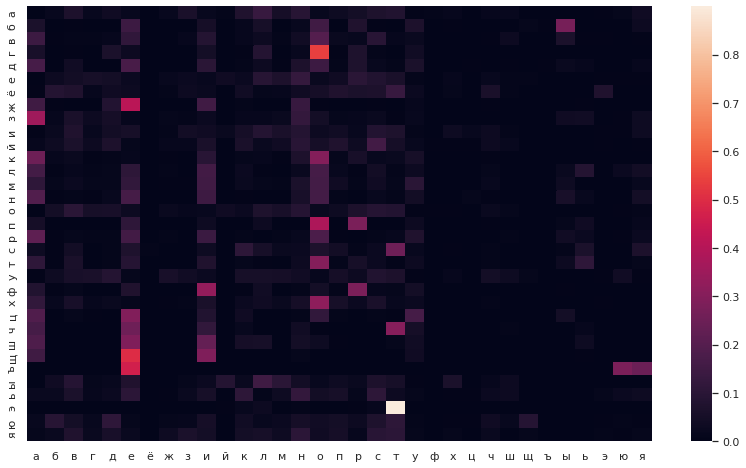

In [8]:
plt.figure(figsize=(14,8))
sns.heatmap(df)
plt.show()

In [13]:
start = POS['п']
end = POS['р']
prior = 1. / len(rus_)
for d in rus_:
    for c in rus_:
        proba = prior * probabilities[start, POS[c]] *probabilities[POS[c], POS[d]]* probabilities[POS[d], end]
        if proba > 0:
            print(''.join(['п', c, d,'р']), proba)

паар 2.5207649190691473e-07
пбар 3.1236073795011473e-09
пвар 2.3445369932244688e-08
пгар 3.4914345584514195e-08
пдар 1.9650164035098934e-08
пеар 3.741228462651959e-07
пжар 3.53851715243744e-09
пзар 8.495831632742343e-09
пиар 2.2689022907869412e-07
пкар 1.1958677595456024e-06
плар 7.273482836756081e-06
пмар 1.06010507167346e-08
пнар 9.273282436387336e-07
поар 9.136588180581851e-07
ппар 1.4423182890723875e-07
прар 8.772238118226045e-05
псар 2.0924348100666776e-08
птар 3.1766207398052344e-07
пуар 2.2805521467384213e-07
пфар 9.087015041029885e-08
пхар 2.7959512946688115e-09
пцар 1.5299512270989995e-07
пчар 8.842797612280697e-07
пшар 6.625638566542366e-08
пщар 1.7624170019038515e-08
пыар 4.880322530091326e-08
пьар 1.2721385606283491e-06
пяар 2.6480536375716525e-07
пабр 2.2100055338680835e-06
пббр 6.854825415865303e-11
пвбр 1.4948225914830738e-09
пгбр 1.967055942659963e-09
пдбр 5.103125827413172e-10
пебр 7.163030057301005e-06
пжбр 2.594298267833161e-10
пзбр 5.38958387496085e-10
пибр 1.686027

In [14]:
s = []
start = "б"
s.append(start)
length = 8
for i in range(length):
    index = POS[s[i]]
    next_char = np.random.choice(list(rus_), p=probabilities[index])
    s.append(next_char)

print (''.join(s))

бижнавыме


In [21]:
!pip install hmmlearn

     |████████████████████████████████| 368kB 2.9MB/s 


In [0]:
from hmmlearn.hmm import GaussianHMM

In [0]:
series = pd.read_csv("numbers-on-unemployment-benefits1.csv")["Numbers on Unemployment Benefits in Australia: monthly Jan 1956 ? Jul 1992"]

In [0]:
series=series.fillna(0)

In [0]:
values = series.values.reshape(-1,1)

In [29]:
for n in range(1, 14):
    model = GaussianHMM(n_components=n,
                        covariance_type="diag",
                        n_iter=1000)
    model.fit(values)
    print (n, model.score(values))

1 -6065.816086474377
2 -5344.178891346221
3 -5210.765767643192
4 -5148.633606620279
5 -5088.276401197909
6 -4960.7035381481255
7 -4933.581605988037
8 -4894.86437812135
9 -4868.251888236446
10 -4849.568649846109
11 -4794.736236654087
12 -4781.234063502665
13 -4765.852185544904


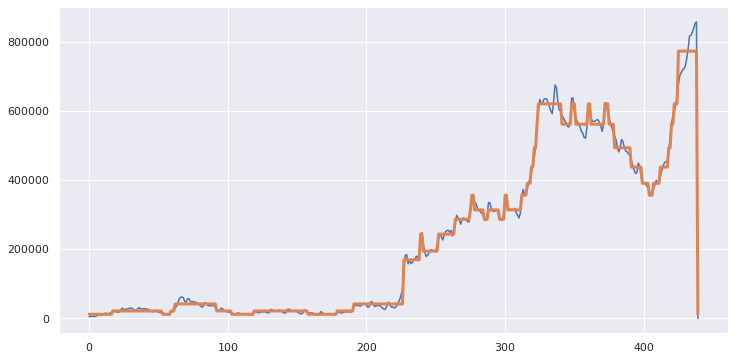

In [38]:
model = GaussianHMM(n_components=15,
                        covariance_type="diag",
                        n_iter=1000)
model.fit(values)
labels = model.predict(values)
means = np.zeros_like(values)
for i in range(model.n_components):
    means[labels == i] = model.means_[i]
    
plt.figure(figsize=(12, 6))
plt.plot(values)
plt.plot(means, linewidth=3)

In [34]:
model.transmat_.shape

(15, 15)